## AUTHORS:

    Sara Jaramillo Cárdenas
    Adrian López Beltrán
    Fernando García Gutiérrez

# Convolutional Neural Network with Pyspark

<h2>Approach</h2>

<h3>Image preprocessing</h3>

<ul>
	<li>
		<b>Image resize to 128 x 128</b>
	</li>
        <br>
	<li>
		<b>Z-scores normalization</b>
	</li>
</ul>

<h3>Network Architecture</h3>
<p></p>
<p align="center">
	<img src="img/FinalNet.jpg" align="middle">
</p>
<br>
<ul>
	<li>
		<b>Weights initialization</b>: Normalized initialization with mean 0 and variance dependent on the number of entries with normal distribution.
	</li>
        <br>
	<li>
		<b>Biases initialization</b>: Random initialization with normal distribution, minimum value of 0.05 and maximum of 0.2.
	</li>
        <br>
	<li>
        <b>Optimizer</b>:Adaptative moments, with learning rate 0.00005 (Variable based on network training results).
	</li>
        <br>
	<li>
		<b>Loss function</b>: Binary cross entropy / Categorical cross entropy.
	</li>
        <br>
	<li>
		<b>Batch size</b>: 64
	</li>
    <br>
	<li>
		<b>Validation split</b>: 20% from training set
	</li>

</ul>



<h2>Theoretical fundament</h2>
<div>
    <br>
	Based on:
    <br>
    <p>
        <li>
            <i>Deep Learning, Ian Goodfellow, Yoshua Bengio, Aaron Courville (2017, MIT)</i>
        </li>
        <li>
            <i>Redes neuronales & deep learning, Fernando Berzal (2018)</i>
        </li>
    </p>
</div>
<h3>Introduction</h3>
<br>
<div> 
    Deep convolutional neural networks (CNN) build what is called a <b>hierarchy of characteristics</b>. This hierarchy is based on the combination of low-level characteristics (edges, spots, etc.) in different layer structures to form high-level characteristics (shapes, objects, etc.). This type of architecture calculates a <b>map of characteristics</b> from local receptive fields of the image. Each feature map element is connected to a small region of the image. <b>Different feature maps share (partially) the same weights</b>. This implies a significant reduction in the number of network parameters. Additionally, this type of structure takes into account the <b>spatial</b> information of each of the pixels allowing to capture the most relevant characteristics of the image. CNNs are formed by a series of <b>convolutional layers, subsampling layers (commonly known as pooling layers) and completely connected layers (essentially multilayer perceptrons)</b>. From the different layers that make up the network, subsampling layers have no parameters to learn.
</div>

<h3>Convolutional layers</h3>
<br>
<div>
	The convolution is the main characteristic of the CNN, this is denoted as Y = X * W, where Y is the result vector of the convolution, X is the input vector or signal and W is the filter or kernel.
	The equation that defines the convolution operation is as follows:
</div>
<p align="center">
	<img src="img/ConvolutionalEc.png" align="middle">
</p>

<div>
    The limits of the input vector X are filled with <b>zero-padding</b> (although there are alternatives), the number of surrounding zeros is denoted by the index p. In the equation the filter has a total of m * n elements and the input vector has dimensions i, j. Given zero fill, the vector x has a size of (i + 2p), (j + 2p). In the filling with zeros discussed above, any p greater than or equal to zero can be used. In this context there are three filling strategies:
</div>
<br>
<div>
	<ol>
		<li>
			<b>Complete</b>: Filling i with p = m - 1 and j with p = n - 1 zeros. Complete filling increases the output dimensions, it is not usually used in practice. Output vector dimensions:	( i + 2( m - 1 ), j + 2( n - 1 ) )
		</li>
		<li>
			<b>Equal</b>: Filling in i and j with p = 1. In this case the output vector Y has the same dimensions as the input vector X.
		</li>
		<li>
			<b>Valid</b>: This type of filling implies a p = 0, that is, without filling.
		</li>
	</ol>
</div>

<div>
    The most used filling in CNNs is the <b>Equal</b>, hence we will use it in our network. One of its main advantages is that it maintains the dimensions from the original image of the input tensors. Therefore, with the convolutional layers, we will maintain the size of the image by reducing it only with the subsampling or pooling layers.
Another important factor to consider is the <b>displacement of the filter W with respect to the input vector</b>, this will have a direct impact on the size of the output layer.
</div>
<br>
<div>
	Another important factor to consider is the <b>displacement of the filter W with respect to the input vector</b>, this will have a direct impact on the size of the output layer.
</div>

<h3>Pooling layers</h3>
<br>
<div>
	This is an interesting element of CNN networks since it decreases the size of the characteristics analyzed by decreasing the computational cost and overfitting. There are several subsampling strategies, usually, max-pooling and mean-pooling (average-pooling) are applied. In this type of layers it is necessary to define the size of the grouping (dimensions of the region to be reduced) and the displacement.
<div>
	Max-pooling assigns the maximum value of the grouping layer to the pixel value of the output layer. On the other hand, mean-pooling calculates the average value.
	One of the characteristics of max-pooling is local invariance, that is, small changes in a region of the grouping region do not affect the result of max-pooling. This allows generating characteristics less sensitive to noise in the data.
</div>

<div>

In general, it is common use max-pooling filters of 2x2 that are applied on adjacent regions of the entrance without overlapping.
 </div>
<h3>Network architecture</h3>
<br>
<div>
	The architecture of a convolutive network usually combines convolutive layers with pooling layers. Sometimes a layer of ReLU units is included between the convolutive layer and the pooling layer that performs a non-linear transformation of its element-to-element input. In the implementation, this layer has been included
</div>
<br>
<div>
	In general, the following scheme is usually used:
</div>
<br>
<p align="center">
	<img src="img/NetworkGenericArch.png" align="middle">
</p>
<div>
	It is usual to concatenate two convolutive layers before each pooling layer, in order to extract more complex characteristics from the input before performing the destructive pooling operation.In addition, it is preferable to use several convolutive layers with small filters to a single large filter.
</div>

<div>
	In order to minimize the impact on memory and computational costs, it is convenient to start from relatively simple topologies and increase their complexity based on the results. When the network training does not converge we are likely to have to add more hidden nodes. The network size should be extended in terms of depth rather than width. This is because a network with multiple hidden layers is able to implement functions of greater complexity and therefore solve more complex problems.
</div>
<br>
<div>
	Empirically it has been shown that the deeper the network the better it usually generalizes. However its training is more complicated, this is because different layers learn at different speeds and the gradient used to adjust the weights will be lower in the layers farther from the output, something called <b>vanishing gradient</b>. A common strategy is to start from a simple model and add layers until the error in the validation set is reduced.
	An alternative commonly used to solve the gradient problem is to use <b>batch normalization</b>, which  normalizes the data of each mini batch before moving on to the next layer.
	Another aspect is the use of different activation functions, it has been seen that the use of sigmoidal neurons usually oversaturates the learning process by slowing it down.
</div>


<h3>What about <b>transferring learning</b></h3>
<br>
<div>
	It consists of using a network previously trained in solving <b>generic problems</b> and then using the same network in solving more specialized problems. However, the available networks have been trained to classify objects that are not found in a medical field as x-ray images. Therefore, <b>in this case, it does not have much sense to use transferring learning since we are using networks trained with objects totally different from our images</b>. In fact, most of the networks available in Keras are trained with ImageNet examples, unrelated to our problem.
</div>

<h3>Activation function</h3>
<br>
<div>
	There is a wide variety of activation functions, in this case, it was decided to use Rectified Linear Units (ReLU). Non-symmetric sigmoidal neurons with respect to origin tend to saturate too early during training, this substantially slows learning. It is common to use activation functions whose derivative is not defined at some points, for example, the rectified linear units (ReLU). These are limited to making a linear combination of their weights and inputs generating a non-linear output. Additionally, the evaluation of this function is much more efficient and the training of the neural networks that use it is faster. The problem with networks that use this activation function is that they are unable to learn when their activation is null since their activation function is flat in this area. For this reason, it is convenient to <b>initialize the biases of the neuron with a small positive value</b> in order for trying getting the neurons to activate during the initial stages of network training.
</div>

<h3>Data preprocessing</h3>
<br>
<div>
	The normalization of the input data is usually done using <b>z-scores</b> (subtract the mean and divide by the standard deviation).
	On the other hand, a simple way to expand the training set in order to improve network performance is to <b>add artificially created examples</b>. Additionally, this approach gives the network <b>invariance against usual changes in data entries</b>.
</div>

<h3>Training performance</h3>
<br>
<div>
	During the training process, two key points must be taken into account:
</div>
<br>
<div>
	<ol>
		<li>
			If the network performance on the training set is not good, it indicates that the training algorithm is not taking advantage of the data, so we must <b>increase its complexity</b>, for example by introducing hidden layers. Likewise, we may be using a too elementary <b>learning rate</b> that prevents their convergence, so a possible solution is to change it. Finally, if correcting the previous two points the performance does not improve, it may be that the quality of the training data is not good enough.
		</li>
        <br>
		<li>
			If the network performance is much worse in the test set than in the training set, it is usually necessary to <b>expand the training set</b>. Another alternative is to use <b>regularization strategies</b> to prevent overfitting, or reduce the complexity of the network.
		</li>
	</ol>
</div>

<p align="center">
	<img src="img/NNparams.gif" align="middle">
</p>

<div>
    <br>
	An interesting regularization strategy is the <b>dropout</b>. This strategy consists of each iteration randomly eliminating a fraction of the neurons located in the hidden layers with a certain probability. We will use the commonly used probability of 0.5.
</div>
<div>
	The aforementioned regularization strategy works so well because by eliminating a significant percentage of neurons, the network is forced to learn a more redundant representation of the data. In this way, more general and robust data patterns are learned. it is important to keep in mind that the dropout is only carried out during the training phase. TensorFlow automatically implements an escalation strategy to compensate for the weights of the eliminated neurons. This is important because if for example, we eliminate 40% of neurons, we must reduce the activation of active neurons to 40%.
</div>


<h3>Weight and biases initialization</h3>
<br>
<div>
	It is recommended that the weights be initialized with small values, close to zero and both positive and negative. This facilitates that given an error signal some weights are updated in one direction and others in the opposite direction. However, it may happen that with this initialization the weights end up being null. <b>That should be avoided especially when using ReLU units</b>. If the weights are too high they can generate problems associated with saturation of the network neurons or chaotic behavior of the algorithm. On the other hand, if these weights are too low, it will happen that many of the neurons end up becoming redundant.
</div>
<br>
<div>
	There are different initialization strategies, in the end, everything consists of testing and contrasting results. However, when using ReLU units, researchers at <b>Microsoft Research</b> suggest that the variance in the initialization of the weights be doubled. Normally the networks that use ReLU units initialize their weights following these two equations:
</div>
<p align="center">
	<img src="img/WeightIni.png" align="middle">
</p>
<div>
	On the other hand, in the biases initialization, we are interested in preventing ReLU units from becoming overly saturated. During initialization they are usually assigned a small positive bias. This allows the units to remain active initially for most of the training data.
</div>

<h3>Learning rate</h3>
<br>
<div>
	If the learning rate is too small, the convergence of the network may be unnecessarily slow as the weights change very poorly. On the other hand, when it is too high it can trigger oscillations resulting in unstable behavior. When it is observed that the error oscillates the learning rate is reduced, on the other hand, if the algorithm learns slowly the error is usually increased.
	A commonly followed strategy is that the learning rate is initially high and subsequently decreases.
</div>

<h3>Moments</h3>
<br>
<div>
	The use of moments is equivalent to including a certain "inertia" in the learning of the network. This helps the descending gradient does not get stuck in local minimums. Keep in mind that the use of moments with a value that is too high may cause the algorithm to oscillate, while the use of moments that are too low will get stuck in local minimums. 
</div>
<br>
<div>
	Another alternative is to gradually decrease the learning rate used. In this context, Keras provides many optimizers.<b>Adam</b> has been used in our model. This algorithm uses adaptative moments.
</div>
<ul>
	<li>
		<b>AdaGrad</b>: Individual adjustment of the learning rates for each parameter of the network making the adjustment inversely proportional to the square root of the sum of the historical values of the squared gradient. Its main drawback is that <b>learning rates decrease too early.</b>
	</li>
    <br>
	<li>
		<b>AdaDelta</b>: This is an improvement of AdaGrad that instead of accumulating all historical gradients is limited to the last N values. It is generally observed that this optimizer converges faster than AdaGrad and achieves better solutions.
	</li>
    <br>
	<li>
		<b>RMSprop</b>: This algorithm only uses the gradient sign to modify the weights and the magnitude of update is calculated dynamically. This usually works quite well when combined with moments like Nesterov.
	</li>
    <br>
	<li>
		<b>vSGD</b>: Automatically adjusts the learning rates trying to optimize the expected value of the error function.
	</li>
    <br>
	<li>
		Other commonly used optimizers are <b>AdaSecant</b>, Adam variants such as <b>AdaMax</b> and <b>NAdam</b> or <b>Rprop</b> and their derivatives.
	</li>

</ul>
<br>
<p align="center">
	<img src="img/FIN.gif" align="middle">
</p>
<br>
<br>

# Library load and spark initialization

In [1]:
import os
## Run spark-deep-learning 
SUBMIT_ARGS = "--packages databricks:spark-deep-learning:1.5.0-spark2.4-s_2.11 pyspark-shell"
os.environ["PYSPARK_SUBMIT_ARGS"] = SUBMIT_ARGS

In [2]:
import findspark
SPARK_DIR = '/opt/spark/spark-2.4.4-bin-hadoop2.7'  # Pyspark directory
findspark.init(SPARK_DIR)

In [3]:
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SQLContext
# Memory configuration
conf = SparkConf().setAppName("App")
conf = (conf.setMaster('local[5]')\
       .set('spark.executor.memory', '8G')\
       .set('spark.driver.memory', '8G')\
       .set('spark.driver.maxResultSize', '8G'))
# Pyspark launch
sc = SparkContext(conf = conf)
sqlContext = SQLContext(sc)
sc.version

'2.4.4'

In [4]:
## Pyspark library
import pyspark.ml.linalg as spla
import pyspark.sql.types as sptyp
from pyspark.ml.image import ImageSchema
from pyspark.sql.functions import lit
from pyspark.sql.types import StringType, IntegerType
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

## Sparkdl library
from sparkdl.image import imageIO
from sparkdl import KerasImageFileTransformer
from sparkdl.udf.keras_image_model import registerKerasImageUDF
from sparkdl.estimators.keras_image_file_estimator import KerasImageFileEstimator

## Keras library
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.initializers import VarianceScaling, RandomUniform
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint

## Sklearn evaluation
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

## Others
import cv2
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import collections
from tqdm.notebook import tqdm

Using TensorFlow backend.


## Images

In [5]:
 def show_img(directories, reshape, number_of_images):
    """Function used to represent images"""
    number_of_conditions = len(directories)
    # Define the grid
    f, ax = plt.subplots(number_of_conditions, number_of_images, figsize=(30,10))
    actual_condition = -1
    show_ = number_of_images
    
    # Dict {"condition":[directory_1, directory_2, ...]}
    for condition, directory in directories.items():  
        actual_condition += 1
        for file in os.listdir(directory):
            if not file.startswith('.'):
                show_ -= 1
                # Load image
                img = PIL.Image.open(f'{directory}/{file}').convert('LA').resize(reshape, PIL.Image.ANTIALIAS)
                # Plot image
                ax[actual_condition, show_].imshow(img)
                ax[actual_condition, show_].set_title(condition)
                ax[actual_condition, show_].axis('off')
                ax[actual_condition, show_].set_aspect('auto')
                if show_ == 0:
                    break
        show_ = number_of_images        
    plt.show()

In [25]:
NORMAL_DIR = "../chest_xray/chest_xray/train/NORMAL/"
PNEUMONIA_DIR = "../chest_xray/chest_xray/train/PNEUMONIA/"

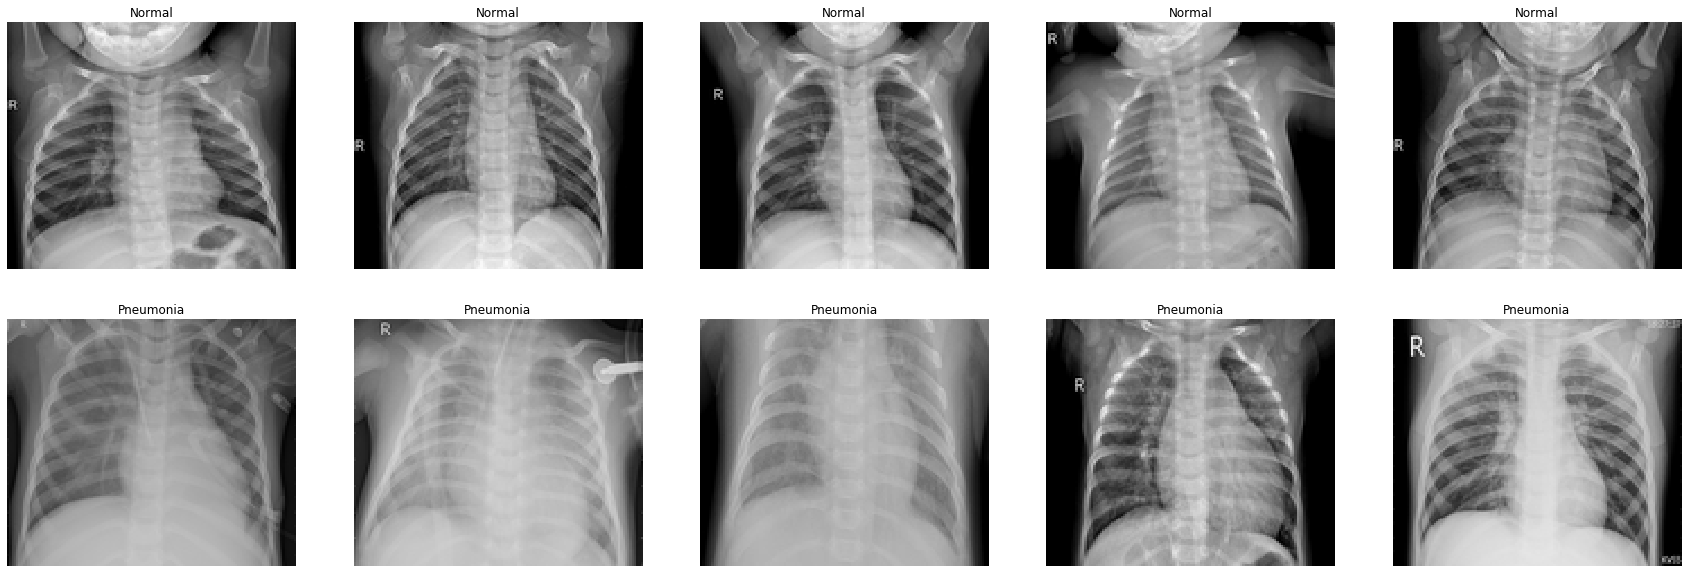

In [7]:
## It shows 4 images from normal and pneuomia condition, rescaling to 128 x 128, 
show_img(
    directories={"Normal":NORMAL_DIR, "Pneumonia":PNEUMONIA_DIR}, 
    reshape=(128, 128), 
    number_of_images=5)

# Keras model construction

## Functions

In [6]:
def get_data(Dir, reshape):
    """Function used to get and normalize images for train Keras models"""
    X, y = [], []
    for directory in os.listdir(Dir):
        if not directory.startswith('.'):
            # Assign the label based on the directory name 
            if directory in ['NORMAL']:
                label = 0
            elif directory in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
            directory_ = Dir + directory  # Temporal variable denoted by _
            for file in tqdm(os.listdir(directory_), desc='Loading images: '):
                if not file.startswith('.'):
                    img = (PIL.Image.open(f'{directory_}/{file}').convert('LA').resize(reshape, PIL.Image.ANTIALIAS))
                    img_arr = np.array(img).astype(np.float32)
                    # The function convert('LA') append a column with 255, it is neccessary remove it
                    img_arr = np.delete(img_arr, np.s_[1], axis=2) 
                    # Normalization using Z-scores
                    img_arr /= 255
                    img_arr = (img_arr - np.mean(img_arr))/np.std(img_arr)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

## Load data

In [7]:
## Image directory
TRAIN_DIR = '../chest_xray/chest_xray/train/'
TEST_DIR =  '../chest_xray/chest_xray/test/'

In [8]:
## Load and ajust the image quality
X_train, Y_train = get_data(TRAIN_DIR, reshape=(128, 128))  
X_test, Y_test = get_data(TEST_DIR, reshape=(128, 128))

In [9]:
## Transform label from integer to categorical
Y_train = to_categorical(Y_train, 2)
Y_test = to_categorical(Y_test, 2)

## Train network

In [35]:
## Weights initialization
weigths = VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None)

## Bias initialization
bias= RandomUniform(minval=0.05, maxval=0.2, seed=None)

In [36]:
model = Sequential()

## (CONV + ReLU + NORMALIZATION) x 2 + MAX-POOLING
model.add(Conv2D(32, (2,2), padding='same', input_shape=(128, 128, 1), 
                 activation='relu', kernel_initializer=weigths, 
                 bias_initializer=bias, name='Conv_1_1'))
model.add(BatchNormalization())          

model.add(Conv2D(32, (2,2), padding='same', activation='relu',
                 kernel_initializer=weigths, bias_initializer=bias,
                 name='Conv_1_2'))
model.add(BatchNormalization(name='Normalization_1'))

model.add(MaxPooling2D(pool_size=(2,2), name='Max-pooling_1'))

## (CONV + ReLU + NORMALIZATION) x 2 + MAX-POOLING
model.add(Conv2D(64, (2,2), padding='same', activation='relu',
                 kernel_initializer=weigths, bias_initializer=bias,
                 name='Conv_2_1'))
model.add(BatchNormalization())

model.add(Conv2D(64, (2,2), padding='same', activation='relu',
                 kernel_initializer=weigths, bias_initializer=bias,
                 name='Conv_2_2'))
model.add(BatchNormalization(name='Normalization_2'))

model.add(MaxPooling2D(pool_size=(2,2), name='Max-pooling_2'))

## (CONV + ReLU + NORMALIZATION) x 2 + MAX-POOLING
model.add(Conv2D(32, (2,2), padding='same', activation='relu',
                 kernel_initializer=weigths, bias_initializer=bias,
                 name='Conv_1_3'))
model.add(BatchNormalization(name='Normalization_3'))

model.add(Conv2D(16, (2,2), padding='same', activation='relu',
                 kernel_initializer=weigths, bias_initializer=bias,
                 name='Conv_4_1'))
model.add(BatchNormalization(name='Normalization_4'))

model.add(MaxPooling2D(pool_size=(2,2), name='Max-pooling_3'))

## FLATTEN -> (LAYER + DROPOUT + NORMALIZATION) x 2 
model.add(Flatten(name='Flatten_to_1D'))

model.add(Dense(128, activation='relu', kernel_initializer=weigths, 
                bias_initializer=bias, name='Dense_1'))
model.add(Dropout(0.4, name='Dropout_1_0.4'))
model.add(BatchNormalization(name='Normalization_5'))

model.add(Dense(64, activation='relu', kernel_initializer=weigths, 
                bias_initializer=bias, name='Dense_2'))
model.add(Dropout(0.4, name='Dropout_2_0.4'))
model.add(BatchNormalization(name='Normalization_6'))

## LAYER + NORMALIZATION + LAYER (Softmax)
model.add(Dense(16, activation='relu', kernel_initializer=weigths, 
                bias_initializer=bias, name='Dense_3'))
model.add(BatchNormalization(name='Normalization_7'))

model.add(Dense(2, activation='softmax', name='Softmax_Binary'))

In [37]:
## Save untrained model to train using pyspark
model.save("./cnn-models/Keras-model-untrained.h5")

In [38]:
model.compile(loss = 'binary_crossentropy',
             optimizer = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False),
             metrics = ['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1_1 (Conv2D)            (None, 128, 128, 32)      160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
Conv_1_2 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
Normalization_1 (BatchNormal (None, 128, 128, 32)      128       
_________________________________________________________________
Max-pooling_1 (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
Conv_2_1 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 64)        256       
__________

In [39]:
MODELS_PATH="./keras-models/Model-{epoch:02d}-{val_acc:.2f}.h5"
checkpoint = ModelCheckpoint(filepath= MODELS_PATH, monitor = 'val_acc',
                             verbose = 1,save_best_only = False, mode = 'max')


train_eval = model.fit(X_train, Y_train, batch_size = 64,\
                       epochs = 50, validation_split=0.2, callbacks= [checkpoint], verbose = 1)

Train on 4172 samples, validate on 1044 samples
Epoch 1/50
4172/4172 [==============================] - 307s 73ms/step - loss: 0.7862 - acc: 0.5796 - val_loss: 0.6551 - val_acc: 0.6456

Epoch 00001: saving model to ./keras-models/Model-01-0.65.h5
Epoch 2/50
4172/4172 [==============================] - 305s 73ms/step - loss: 0.6438 - acc: 0.6651 - val_loss: 0.5474 - val_acc: 0.7337

Epoch 00002: saving model to ./keras-models/Model-02-0.73.h5
Epoch 3/50
4172/4172 [==============================] - 305s 73ms/step - loss: 0.5635 - acc: 0.7236 - val_loss: 0.5007 - val_acc: 0.7567

Epoch 00003: saving model to ./keras-models/Model-03-0.76.h5
Epoch 4/50
4172/4172 [==============================] - 306s 73ms/step - loss: 0.5138 - acc: 0.7620 - val_loss: 0.4240 - val_acc: 0.8199

Epoch 00004: saving model to ./keras-models/Model-04-0.82.h5
Epoch 5/50
4172/4172 [==============================] - 305s 73ms/step - loss: 0.4769 - acc: 0.7733 - val_loss: 0.3965 - val_acc: 0.8343

Epoch 00005: savin

4172/4172 [==============================] - 304s 73ms/step - loss: 0.1719 - acc: 0.9557 - val_loss: 0.1835 - val_acc: 0.9617

Epoch 00042: saving model to ./keras-models/Model-42-0.96.h5
Epoch 43/50
4172/4172 [==============================] - 304s 73ms/step - loss: 0.1682 - acc: 0.9602 - val_loss: 0.1763 - val_acc: 0.9617

Epoch 00043: saving model to ./keras-models/Model-43-0.96.h5
Epoch 44/50
4172/4172 [==============================] - 304s 73ms/step - loss: 0.1680 - acc: 0.9571 - val_loss: 0.1700 - val_acc: 0.9636

Epoch 00044: saving model to ./keras-models/Model-44-0.96.h5
Epoch 45/50
4172/4172 [==============================] - 304s 73ms/step - loss: 0.1602 - acc: 0.9605 - val_loss: 0.1701 - val_acc: 0.9626

Epoch 00045: saving model to ./keras-models/Model-45-0.96.h5
Epoch 46/50
4172/4172 [==============================] - 304s 73ms/step - loss: 0.1606 - acc: 0.9614 - val_loss: 0.1717 - val_acc: 0.9636

Epoch 00046: saving model to ./keras-models/Model-46-0.96.h5
Epoch 47/50


## Evaluate training

In [10]:
def plot_train(train_eval, test_evaluation, test_loss):
    """Plot neural network training process"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
    fig.subplots_adjust(hspace=0.5)

    ax1.plot(train_eval.history['acc'])
    ax1.plot(train_eval.history['val_acc'])
    ax1.plot(test_evaluation, linestyle='--')
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.legend(['train', 'validation', 'test'], loc='upper left')

    ax2.plot(train_eval.history['loss'])
    ax2.plot(train_eval.history['val_loss'])
    ax2.plot(test_loss, linestyle='--')
    ax2.set_title('Model loss')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'validation', 'test'], loc='upper left')
    plt.show()

In [63]:
test_evaluation, test_loss = [], []
for model_file in os.listdir("./keras-models/"):
    model = load_model('./keras-models/%s' % model_file)
    evaluation = model.evaluate(X_test, Y_test)
    test_loss.append(evaluation[0])
    test_evaluation.append(evaluation[1])
    
epochs = [x for x in range(51)]

624/624 [==============================] - 29s 47ms/step


<IPython.core.display.Javascript object>


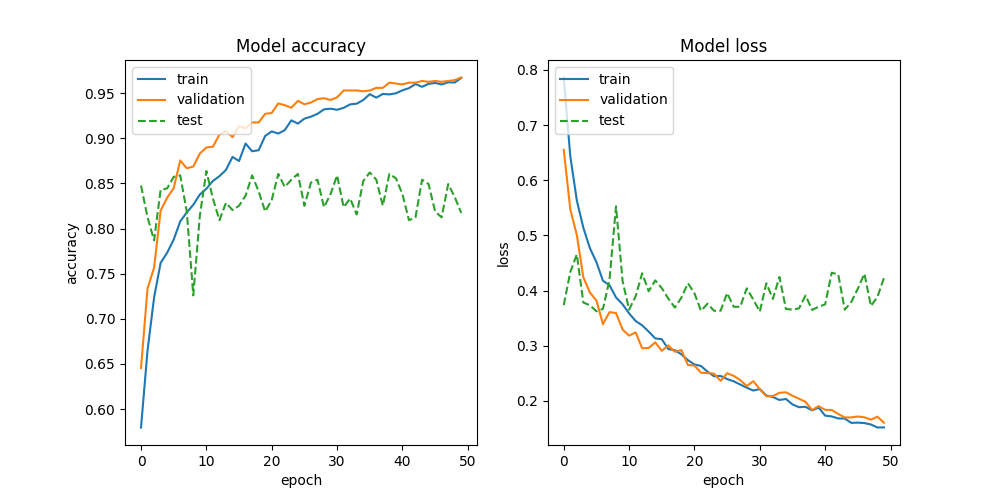

In [69]:
%matplotlib notebook
plot_train(train_eval, test_evaluation, test_loss)

In [76]:
print("Max accuracy in epoch %d" % np.argmax(test_evaluation))
print("Min loss in epoch %d" % np.argmin(test_loss))

Max accuracy in epoch 10
Min loss in epoch 30


In [11]:
model = load_model("./keras-models/Model-30-0.94.h5")

In [12]:
model.evaluate(X_test, Y_test)

624/624 [==============================] - 18s 28ms/step


[0.3750578711430232, 0.8381410256410257]

In [17]:
## It may need more epochs
model = load_model("./keras-models/Model-50-0.97.h5")

In [18]:
## Learning rate disminution
from keras import backend as K
print(K.get_value(model.optimizer.lr))
K.set_value(model.optimizer.lr, 1e-06)
print(K.get_value(model.optimizer.lr))

1e-05
1e-06


In [19]:
MODELS_PATH="./keras-models/Model_50_plus_-{epoch:02d}-{val_acc:.2f}.h5"
checkpoint = ModelCheckpoint(filepath= MODELS_PATH, monitor = 'val_acc',
                             verbose = 1,save_best_only = False, mode = 'max')
train_eval = model.fit(X_train, Y_train, batch_size = 64,\
                       epochs = 20, validation_split=0.2, callbacks= [checkpoint], verbose = 1)

Train on 4172 samples, validate on 1044 samples
Epoch 1/20
4172/4172 [==============================] - 314s 75ms/step - loss: 0.1454 - acc: 0.9710 - val_loss: 0.1650 - val_acc: 0.9655

Epoch 00001: saving model to ./keras-models/Model_50_plus_-01-0.97.h5
Epoch 2/20
4172/4172 [==============================] - 324s 78ms/step - loss: 0.1440 - acc: 0.9684 - val_loss: 0.1630 - val_acc: 0.9655

Epoch 00002: saving model to ./keras-models/Model_50_plus_-02-0.97.h5
Epoch 3/20
4172/4172 [==============================] - 332s 79ms/step - loss: 0.1453 - acc: 0.9696 - val_loss: 0.1595 - val_acc: 0.9665

Epoch 00003: saving model to ./keras-models/Model_50_plus_-03-0.97.h5
Epoch 4/20
4172/4172 [==============================] - 311s 75ms/step - loss: 0.1457 - acc: 0.9698 - val_loss: 0.1589 - val_acc: 0.9665

Epoch 00004: saving model to ./keras-models/Model_50_plus_-04-0.97.h5
Epoch 5/20
4172/4172 [==============================] - 338s 81ms/step - loss: 0.1398 - acc: 0.9734 - val_loss: 0.1558 -

In [34]:
test_evaluation, test_loss = [], []
for model_file in os.listdir("./keras-models/"):
    if model_file.startswith('Model_50_plus'):
        model = load_model('./keras-models/%s' % model_file)
        evaluation = model.evaluate(X_test, Y_test)
        test_loss.append(evaluation[0])
        test_evaluation.append(evaluation[1])

epochs = [x for x in range(16)]

624/624 [==============================] - 19s 31ms/step


<IPython.core.display.Javascript object>


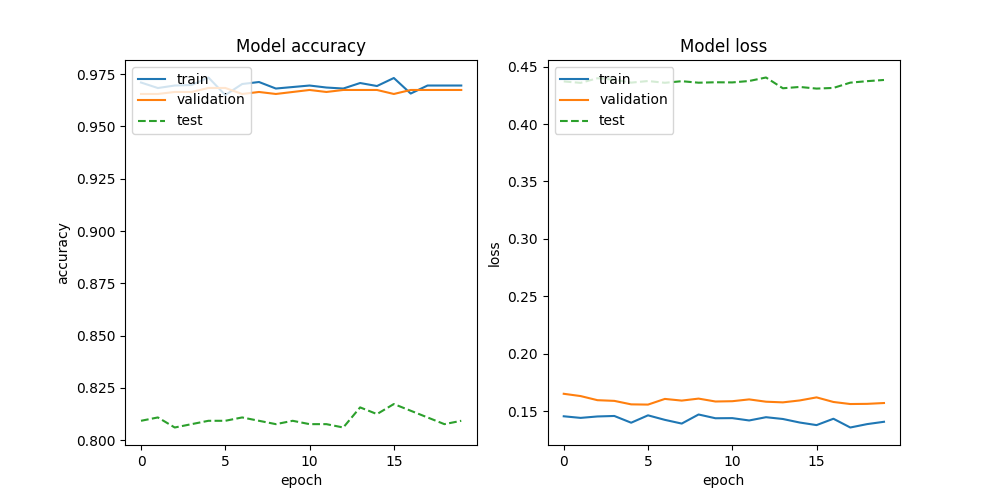

In [37]:
%matplotlib notebook
plot_train(train_eval, test_evaluation, test_loss)

There is no improvement in performance, most likely the network is not deep enough to learn to better differentiate both conditions. In addition, the imbalance between both classes makes training difficult. **Therefore we select a model from a previous epoch**.

In this case we will seek the balance between precision and recall, it will depend on the type of problem.

**Next we show the same model in different epochs preserving a greater precision or a greater recall**

### Model with high precision and good recall

In [47]:
model = load_model("./keras-models/Model-14-0.91.h5")

In [48]:
model.evaluate(X_test, Y_test)

624/624 [==============================] - 21s 34ms/step


[0.36548612744380266, 0.8621794871794872]

<IPython.core.display.Javascript object>


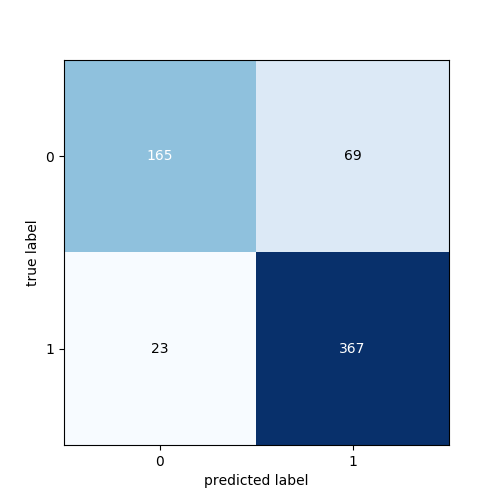

In [59]:
## Compute confusion matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(Y_test,axis = 1)
CM = confusion_matrix(y_true, pred)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [60]:
print("Precision: %1.2f" %(CM[1][1] / (CM[1][1] + CM[0][1])) )
print("Recall: %1.2f" %(CM[1][1] / (CM[1][1] + CM[1][0])))

Precision: 0.84
Recall: 0.94


### Model with 82% precision and 96% recall

In the problem, false negatives have worse consequences than false positives, therefore we are interested in a model with a low recall

In [13]:
model = load_model("./keras-models/Model-30-0.94.h5")

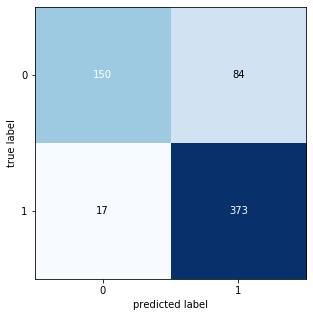

In [14]:
## Compute confusion matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(Y_test,axis = 1)
CM = confusion_matrix(y_true, pred)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [15]:
print("Precision: %1.2f" %(CM[1][1] / (CM[1][1] + CM[0][1])) )
print("Recall: %1.2f" %(CM[1][1] / (CM[1][1] + CM[1][0])))

Precision: 0.82
Recall: 0.96


To achieve better performance it is necessary to expand the available data, or train a deeper network capable of extracting more features. However, training a deeper network is more expensive.

In [ ]:
## Clear variables
del X_train, X_test, Y_train, Y_test, model

# Pyspark implementation

## Functions

In [5]:
def CreateTrainImageUriandLabels(image_uris, label, cardinality):
    """Function for load images as pyspark DataFrame"""
    local_rows = []
    for uri in image_uris:
        label_inds = np.zeros(cardinality)
        label_inds[label] = 1.0
        one_hot_vec = spla.Vectors.dense(label_inds.tolist())
        _row_struct = {"uri": uri, "one_hot_label": one_hot_vec, "label": float(label)}
        row = sptyp.Row(**_row_struct)
        local_rows.append(row)

    image_uri_df = sqlContext.createDataFrame(local_rows)
    return image_uri_df

In [6]:
def load_image_from_uri(local_uri):
    """Function for pass images to the model"""
    # Load and rescale image
    img = (PIL.Image.open(local_uri).convert('LA').resize((128, 128), PIL.Image.ANTIALIAS))
    img_arr = np.array(img).astype(np.float32)
    img_arr = np.delete(img_arr, np.s_[1], axis=2)
    # Image normalization using Z-scores
    img_arr /= 255
    img_arr = (img_arr - np.mean(img_arr))/np.std(img_arr)
    return img_arr

## Load data

In [7]:
# DEFINE IMAGE DIRECTORIES
NORMAL_TRAIN = '../chest_xray/chest_xray/train/NORMAL'
NORMAL_TEST =  '../chest_xray/chest_xray/test/NORMAL'
PNEU_TRAIN = '../chest_xray/chest_xray/train/PNEUMONIA'
PNEU_TEST = '../chest_xray/chest_xray/test/PNEUMONIA'

In [8]:
label_cardinality = 2

## Get a list with all images
normal_train_f = [os.path.abspath(f'{NORMAL_TRAIN}/{f}') for f in os.listdir(NORMAL_TRAIN) if f.endswith('.jpeg')]
normal_test_f = [os.path.abspath(f'{NORMAL_TEST}/{f}') for f in os.listdir(NORMAL_TEST) if f.endswith('.jpeg')]
pneumonia_train_f = [os.path.abspath(f'{PNEU_TRAIN}/{f}') for f in os.listdir(PNEU_TRAIN) if f.endswith('.jpeg')]
pneuominia_test_f = [os.path.abspath(f'{PNEU_TEST}/{f}') for f in os.listdir(PNEU_TEST) if f.endswith('.jpeg')]

## Create pyspark DataFrame
normal_train_df = CreateTrainImageUriandLabels(normal_train_f, 0, label_cardinality)
normal_test_df = CreateTrainImageUriandLabels(normal_test_f, 0, label_cardinality)
pneumonia_train_df = CreateTrainImageUriandLabels(pneumonia_train_f,1,label_cardinality)
pneuominia_test_df = CreateTrainImageUriandLabels(pneuominia_test_f,1,label_cardinality)

## Merge train and test DataFrames
train_df = normal_train_df.unionAll(pneumonia_train_df)
test_df = normal_test_df.unionAll(pneuominia_test_df)

## To decrease memory usage
train_df = train_df.repartition(100)
test_df = test_df.repartition(100)

In [9]:
train_df.registerTempTable("train")
test_df.registerTempTable("test")

In [10]:
negative_train = sqlContext.sql("""SELECT COUNT(label) AS negative_train FROM train WHERE label=0""")
positive_train = sqlContext.sql("""SELECT COUNT(label) AS positive_train FROM train WHERE label=1""")
negative_test = sqlContext.sql("""SELECT COUNT(label) AS negative_test FROM test WHERE label=0""")
positive_test = sqlContext.sql("""SELECT COUNT(label) AS positive_test FROM test WHERE label=1""")

In [11]:
class_balance = np.array([
    negative_train.toPandas()['negative_train'][0],
    positive_train.toPandas()['positive_train'][0],
    negative_test.toPandas()['negative_test'][0],
    positive_test.toPandas()['positive_test'][0]])

<IPython.core.display.Javascript object>


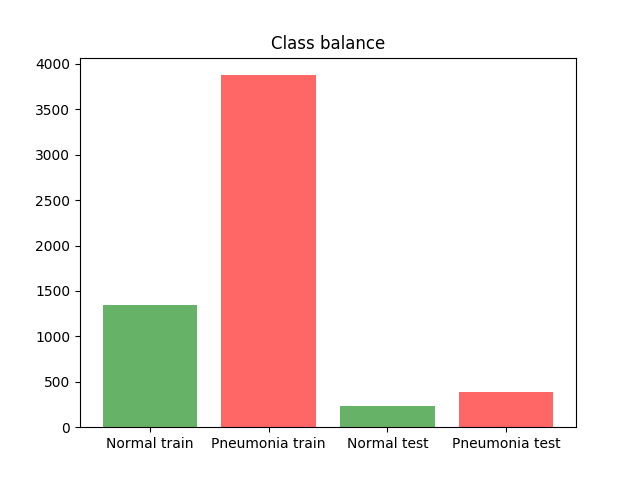

In [12]:
%matplotlib notebook
## Analyze the class balance
plt.bar(np.arange(4), class_balance, align='center', alpha=0.6, color=['green', 'red'])
plt.xticks(np.arange(4), ['Normal train', 'Pneumonia train', 'Normal test', 'Pneumonia test'])
plt.title('Class balance')
plt.show()

## Pass the network trained in keras to pyspark

In [23]:
## Get file names
normal_test_f = [
    os.path.abspath(f'{NORMAL_TEST}/{f}') for f in os.listdir(NORMAL_TEST) if f.endswith('.jpeg')]
pneumonia_test_f = [
    os.path.abspath(f'{PNEU_TEST}/{f}') for f in os.listdir(PNEU_TEST) if f.endswith('.jpeg')]

In [24]:
## Create DataFrames
normal_test_df = sqlContext.createDataFrame(
    normal_test_f, StringType()).toDF("uri").withColumn('label',lit(0))

pneumonia_test_df = sqlContext.createDataFrame(
    pneumonia_test_f, StringType()).toDF("uri").withColumn('label',lit(1))

test_df = normal_test_df.unionAll(pneumonia_test_df)

In [25]:
## Best model saved in keras-models
BEST_MODEL = "./keras-models/Model-30-0.94.h5"

transformer = KerasImageFileTransformer(inputCol="uri", outputCol="prediction",
                                        modelFile=BEST_MODEL,  
                                        imageLoader=load_image_from_uri,
                                        outputMode="vector")

In [26]:
pyspark_predictions = transformer.transform(test_df)

INFO:tensorflow:Froze 56 variables.
INFO:tensorflow:Converted 56 variables to const ops.
INFO:tensorflow:Froze 0 variables.
INFO:tensorflow:Converted 0 variables to const ops.


In [27]:
## Get predictions and true label
predictions = np.array(pyspark_predictions.select('prediction').collect())
y_true = np.array(pyspark_predictions.select('label').collect())

<IPython.core.display.Javascript object>


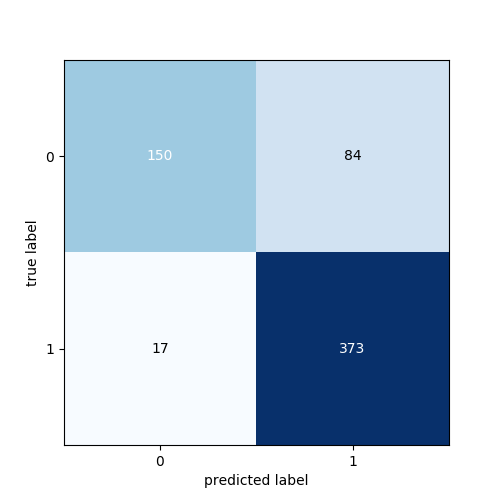

In [28]:
%matplotlib notebook
## Confusion matrix
pred = np.argmax(np.reshape(predictions, newshape=(len(predictions), 2)), axis = 1) 
Y_true = np.reshape(y_true, newshape=(len(y_true), ))
CM = confusion_matrix(Y_true, pred)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [29]:
## Precision
print("Precision: %1.2f" %(CM[1][1] / (CM[1][1] + CM[0][1])) )
## Recall
print("Recall: %1.2f" %(CM[1][1] / (CM[1][1] + CM[1][0])))

Precision: 0.82
Recall: 0.96


<IPython.core.display.Javascript object>


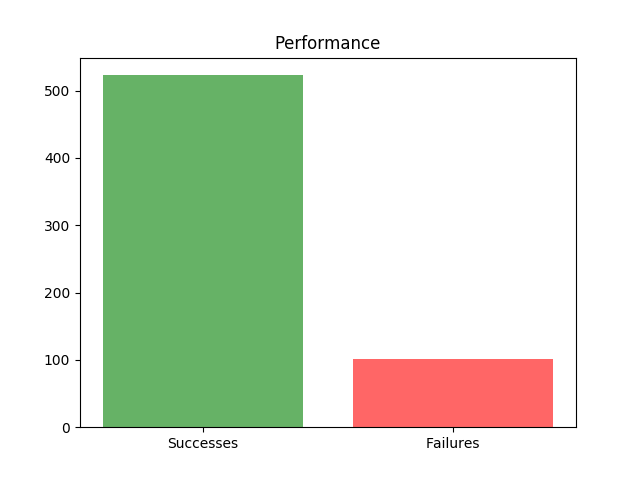

In [30]:
%matplotlib notebook
plt.bar(
    np.arange(2), np.array([(CM[0][0] + CM[1][1]),(CM[0][1] + CM[1][0])]), 
    align='center', alpha=0.6, color=['green', 'red'])
plt.xticks(np.arange(2), ['Successes', 'Failures'])
plt.title('Performance')
plt.show()

## Train a new network from scratch using pyspark (proof-of-concept)

One of the advantages of pyspark is that it is possible to **define a grid with different parameters to train the network.** In this case, due to technical limitations, we will limit training to a few times by trying different combinations of batches and optimizers

In [10]:
def load_image_in_rgb(local_uri):
    img = (PIL.Image.open(local_uri).convert('RGB').resize((128, 128), PIL.Image.ANTIALIAS))
    img_arr = np.array(img).astype(np.float32)
    img_tnsr = preprocess_input(img_arr[np.newaxis, :])/255
    return img_tnsr

In [32]:
## Simple network
pyspark_model = Sequential()
pyspark_model.add(Conv2D(32, (2,2), input_shape=(128, 128, 3), 
                         padding='same', activation='relu'))
pyspark_model.add(BatchNormalization()) 
pyspark_model.add(MaxPooling2D(pool_size=(2,2)))

pyspark_model.add(Conv2D(64, (2,2), padding='same', activation='relu'))
pyspark_model.add(BatchNormalization()) 
pyspark_model.add(MaxPooling2D(pool_size=(2,2)))

pyspark_model.add(Conv2D(64, (2,2), padding='same', activation='relu'))
pyspark_model.add(BatchNormalization()) 
pyspark_model.add(MaxPooling2D(pool_size=(2,2)))

pyspark_model.add(Conv2D(32, (2,2), padding='same', activation='relu'))
pyspark_model.add(BatchNormalization()) 
pyspark_model.add(MaxPooling2D(pool_size=(2,2)))

pyspark_model.add(Flatten())

pyspark_model.add(Dense(128, activation='relu'))
pyspark_model.add(Dense(32, activation='relu'))
pyspark_model.add(Dense(2, activation='softmax'))

pyspark_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        16448     
__________

In [33]:
pyspark_model.save('/tmp/pyspark-model.h5')

In [11]:
## Network training defined in keras with pyspark
estimator = KerasImageFileEstimator(inputCol="uri",
                                    outputCol="prediction",
                                    labelCol="one_hot_label",
                                    imageLoader=load_image_in_rgb,
                                    kerasLoss="categorical_crossentropy", 
                                    modelFile='/tmp/pyspark-model.h5')

In [12]:
paramGrid = (
    ParamGridBuilder()
    .addGrid(estimator.kerasFitParams, [{'epochs':3, 'batch_size':64}, 
                                        {'epochs':3, 'batch_size':32}])
    .addGrid(estimator.kerasOptimizer, ["Adam", "Adadelta"])
    .build()
)

In [13]:
model_evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="label")
cv = CrossValidator(
    estimator=estimator, estimatorParamMaps=paramGrid, evaluator=model_evaluator, numFolds=3)

In [14]:
# Train
cvModel = cv.fit(train_df)

INFO:tensorflow:Froze 30 variables.
INFO:tensorflow:Converted 30 variables to const ops.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


INFO:tensorflow:Froze 0 variables.
INFO:tensorflow:Converted 0 variables to const ops.
INFO:tensorflow:Froze 30 variables.
INFO:tensorflow:Converted 30 variables to const ops.
INFO:tensorflow:Froze 0 variables.
INFO:tensorflow:Converted 0 variables to const ops.
INFO:tensorflow:Froze 30 variables.
INFO:tensorflow:Converted 30 variables to const ops.
INFO:tensorflow:Froze 0 variables.
INFO:tensorflow:Converted 0 variables to const ops.
INFO:tensorflow:Froze 30 variables.
INFO:tensorflow:Converted 30 variables to const ops.
INFO:tensorflow:Froze 0 variables.
INFO:tensorflow:Converted 0 variables to const ops.
INFO:tensorflow:Froze 30 variables.
INFO:tensorflow:Converted 30 variables to const ops.
INFO:tensorflow:Froze 0 variables.
INFO:tensorflow:Converted 0 variables to const ops.
INFO:tensorflow:Froze 30 variables.
INFO:tensorflow:Converted 30 variables to const ops.
INFO:tensorflow:Froze 0 variables.
INFO:tensorflow:Converted 0 variables to const ops.
INFO:tensorflow:Froze 30 variable

In [15]:
## Check the grid results
for performance, paramgrid in zip(cvModel.avgMetrics, paramGrid):
    print('Performance: %.2f' % performance, end="\t")
    dict_values = list(paramgrid.values())
    print("Batch size: %d" % dict_values[0]['batch_size'], end="\t")
    print("Optimizer: %s" % dict_values[1])
    print("")

Performance: 0.47	Batch size: 64	Optimizer: Adam

Performance: 0.47	Batch size: 64	Optimizer: Adadelta

Performance: 0.47	Batch size: 32	Optimizer: Adam

Performance: 0.47	Batch size: 32	Optimizer: Adadelta



In [16]:
# Predict
model_evaluator.evaluate(cvModel.transform(test_df))

INFO:tensorflow:Froze 30 variables.
INFO:tensorflow:Converted 30 variables to const ops.
INFO:tensorflow:Froze 0 variables.
INFO:tensorflow:Converted 0 variables to const ops.


0.39210000000000006

In [17]:
cvModel_predictions = cvModel.transform(train_df)

INFO:tensorflow:Froze 30 variables.
INFO:tensorflow:Converted 30 variables to const ops.
INFO:tensorflow:Froze 0 variables.
INFO:tensorflow:Converted 0 variables to const ops.


In [18]:
cvModel_predictions.toPandas().head(5)

,label,one_hot_label,uri,prediction
0,0.0,"[1.0, 0.0]",/home/fernandogagu/Desktop/chest_xray/chest_xr...,"[0.5051202774047852, 0.49487975239753723]"
1,0.0,"[1.0, 0.0]",/home/fernandogagu/Desktop/chest_xray/chest_xr...,"[0.5047300457954407, 0.4952699840068817]"
2,0.0,"[1.0, 0.0]",/home/fernandogagu/Desktop/chest_xray/chest_xr...,"[0.5069947242736816, 0.49300533533096313]"
3,0.0,"[1.0, 0.0]",/home/fernandogagu/Desktop/chest_xray/chest_xr...,"[0.5080236196517944, 0.49197638034820557]"
4,0.0,"[1.0, 0.0]",/home/fernandogagu/Desktop/chest_xray/chest_xr...,"[0.5053374171257019, 0.4946626126766205]"


**IMPORTANT NOTE:** You can see that the model is not optimized and its performance is low. This is done as proof of concept, with more training better results would be obtained.

## SQL implementation 

In [19]:
registerKerasImageUDF("cnn_network", "./keras-models/Model-30-0.94.h5", load_image_from_uri)

INFO:tensorflow:Froze 0 variables.
INFO:tensorflow:Converted 0 variables to const ops.
INFO:tensorflow:Froze 56 variables.
INFO:tensorflow:Converted 56 variables to const ops.
INFO:tensorflow:Froze 0 variables.
INFO:tensorflow:Converted 0 variables to const ops.
INFO:tensorflow:Froze 0 variables.
INFO:tensorflow:Converted 0 variables to const ops.


In [20]:
## Load test files
normal_test = ImageSchema.readImages(NORMAL_TEST)
normal_test.registerTempTable("NORMAL")
pneumonia_test = ImageSchema.readImages(PNEU_TEST)
pneumonia_test.registerTempTable("PNEUMONIA")

In [21]:
normal_pred = sqlContext.sql("""SELECT cnn_network(image) AS prediction FROM NORMAL""")
pneumonia_pred = sqlContext.sql("""SELECT cnn_network(image) AS prediction FROM PNEUMONIA""")

In [22]:
normal_pred.columns

['prediction']

In [23]:
pneumonia_pred.columns

['prediction']